# Insight for Cab Investment Company

- Which makes more Profit ?

- Which has the largest customer base ?

- Revenue Growth

- Evaluate Customer Satisfaction by Customer Retention Rate

- Payment Mode

- Hypothesis Testing

In [1]:
# Libraries Needed
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
cab_data = pd.read_csv("Cab_Data.csv")

## Data Cleaning

In [3]:
# Check for missing values in data
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [4]:
cab_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [5]:
# Check for the datatype of each column
for item in cab_data.columns:
    print(f"Data type of {item}: {cab_data[item].dtype}")

Data type of Transaction ID: int64
Data type of Date of Travel: int64
Data type of Company: object
Data type of City: object
Data type of KM Travelled: float64
Data type of Price Charged: float64
Data type of Cost of Trip: float64


In [6]:
cab_data["Date of Travel"].head()

0    42377
1    42375
2    42371
3    42376
4    42372
Name: Date of Travel, dtype: int64

In [7]:
# Function to convert the Date of Travel to datetime object
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [8]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x:to_date_format(x))

In [9]:
# Add Months and Yeasrs column for further Analysis
months=[]
years =[]
for i in range(len(cab_data['Date of Travel'])):
    months.append(cab_data['Date of Travel'][i].month)
    years.append(cab_data['Date of Travel'][i].year)
cab_data['Month'] = months
cab_data['Year'] = years

# cab_data.drop('Date of Travel', axis=1, inplace=True)

In [10]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


# 1. Profit Margin

In [11]:
# Split the dataset into Pink Cab and Yellow Cab
pink_cab = cab_data[cab_data['Company']=='Pink Cab']
yellow_cab = cab_data[cab_data['Company']=='Yellow Cab']

## Pink Cab

In [12]:
pink_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


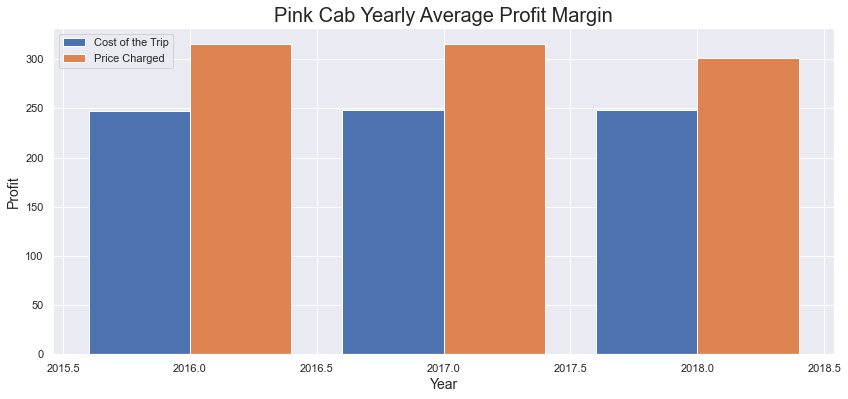

In [13]:
pink_cab_grouped_by_year = pink_cab.groupby("Year")
plot1 = pink_cab_grouped_by_year["Transaction ID"].count()
plot2 = pink_cab_grouped_by_year["Price Charged"].mean()
plot3 = pink_cab_grouped_by_year["Cost of Trip"].mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot3.values, width=0.4, align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab Yearly Average Profit Margin', fontsize=20)
plt.legend()
plt.show()

In [14]:
pink_cab_price_charged_mean = pink_cab_grouped_by_year["Price Charged"].mean()
pink_cab_price_charged_mean = pink_cab_price_charged_mean.to_frame()
pink_cab_price_charged_mean.reset_index(inplace=True)
pink_cab_price_charged_mean

,Year,Price Charged
0,2016,315.850071
1,2017,315.535059
2,2018,301.538134


In [15]:
pink_cab_cost_of_trip_mean = pink_cab_grouped_by_year["Cost of Trip"].mean()
pink_cab_cost_of_trip_mean = pink_cab_cost_of_trip_mean.to_frame()
pink_cab_cost_of_trip_mean.reset_index(inplace=True)

In [16]:
pink_merged_priceCharged_and_CostOfTrip = pd.merge(pink_cab_price_charged_mean, pink_cab_cost_of_trip_mean)
pink_merged_priceCharged_and_CostOfTrip["Profit"] = pink_merged_priceCharged_and_CostOfTrip["Price Charged"] - pink_merged_priceCharged_and_CostOfTrip["Cost of Trip"]
pink_merged_priceCharged_and_CostOfTrip

,Year,Price Charged,Cost of Trip,Profit
0,2016,315.850071,247.039209,68.810861
1,2017,315.535059,248.820917,66.714142
2,2018,301.538134,248.413839,53.124295


## Yellow Cab

In [17]:
yellow_cab.head()
yellow_cab_grouped_by_year = yellow_cab.groupby("Year")

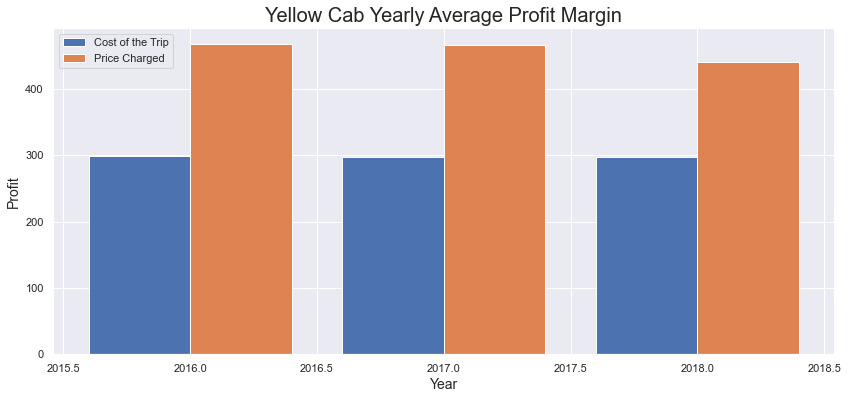

In [18]:
plot1 = yellow_cab_grouped_by_year["Transaction ID"].count()
plot3 = yellow_cab_grouped_by_year["Price Charged"].mean()
plot4 = yellow_cab_grouped_by_year["Cost of Trip"].mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, align='center',label='Price Charged')
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yellow Cab Yearly Average Profit Margin', fontsize=20)
plt.legend()
plt.show()

In [19]:
yellow_cab_price_charged_mean = yellow_cab_grouped_by_year["Price Charged"].mean()
yellow_cab_price_charged_mean = yellow_cab_price_charged_mean.to_frame()
yellow_cab_price_charged_mean.reset_index(inplace=True)
yellow_cab_price_charged_mean

,Year,Price Charged
0,2016,468.230462
1,2017,466.278438
2,2018,440.893159


In [20]:
yellow_cab_cost_of_trip_mean = yellow_cab_grouped_by_year["Cost of Trip"].mean()
yellow_cab_cost_of_trip_mean = yellow_cab_cost_of_trip_mean.to_frame()
yellow_cab_cost_of_trip_mean.reset_index(inplace=True)

In [21]:
yellow_merged_priceCharged_and_CostOfTrip = pd.merge(yellow_cab_price_charged_mean, yellow_cab_cost_of_trip_mean)
yellow_merged_priceCharged_and_CostOfTrip["Profit"] = yellow_merged_priceCharged_and_CostOfTrip["Price Charged"] - yellow_merged_priceCharged_and_CostOfTrip["Cost of Trip"]
yellow_merged_priceCharged_and_CostOfTrip

,Year,Price Charged,Cost of Trip,Profit
0,2016,468.230462,298.536761,169.693701
1,2017,466.278438,297.861544,168.416894
2,2018,440.893159,297.442400,143.450759


In [22]:
pink_merged_priceCharged_and_CostOfTrip = pink_merged_priceCharged_and_CostOfTrip[["Year", "Profit"]]
yellow_merged_priceCharged_and_CostOfTrip = yellow_merged_priceCharged_and_CostOfTrip[["Year", "Profit"]]

In [23]:
Annual_profit = pd.merge(pink_merged_priceCharged_and_CostOfTrip, yellow_merged_priceCharged_and_CostOfTrip, on="Year")
Annual_profit.columns = ["Year","Pink Annual Profit(Mean)", "Yellow Annual Profit(Mean)"]
Annual_profit

,Year,Pink Annual Profit(Mean),Yellow Annual Profit(Mean)
0,2016,68.810861,169.693701
1,2017,66.714142,168.416894
2,2018,53.124295,143.450759


### Conclusion

- From the Analysis above, Yellow cab has a higher profit margin

# 2. Compare Customer Base

In [24]:
customer_data = pd.read_csv("Customer_ID.csv")
Transaction_data = pd.read_csv("Transaction_ID.csv")

In [25]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [26]:
Transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [27]:
customer_transaction_data = pd.merge(customer_data, Transaction_data)

In [28]:
customer_transaction_data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


## Calculate Largest Customer Base

In [29]:
pink_cab_data = cab_data.loc[cab_data["Company"] == "Pink Cab"]
pink_customer_base = pd.merge(pink_cab_data, customer_transaction_data)

In [30]:
pink_customer_base.shape

(84711, 14)

In [31]:
yellow_cab_data = cab_data.loc[cab_data["Company"] == "Yellow Cab"]
yellow_customer_base = pd.merge(yellow_cab_data, customer_transaction_data)

In [32]:
yellow_customer_base.shape

(274681, 14)

In [33]:
print(f"Yellow customer base: {yellow_customer_base.shape[0]}, and Pinks Customer base: {pink_customer_base.shape[0]}")

Yellow customer base: 274681, and Pinks Customer base: 84711


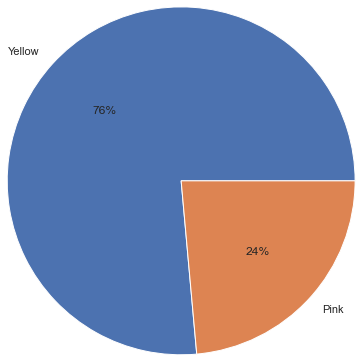

In [34]:
pie_data = [yellow_customer_base.shape[0], pink_customer_base.shape[0]]
labels = ['Yellow', 'Pink']
plt.pie(pie_data, labels = labels, radius=2, autopct='%.0f%%')
# plt.title("Customer Base")
plt.show()

### Conclusion

- Therefore Yellow has a larger customer base

# 3. Revenue Growth

## Pink

In [35]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [36]:
pink_customer_base.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,29290,Male,28,10813,Card
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,27703,Male,27,9237,Card
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,28712,Male,53,11242,Cash
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,28020,Male,23,23327,Cash
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,27182,Male,33,8536,Card


In [37]:
grouped_pink_customer_base = pink_customer_base.groupby(pink_customer_base["Date of Travel"].dt.year).sum()

In [38]:
grouped_pink_customer_base.head()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Month,Year,Customer ID,Age,Income (USD/Month)
Date of Travel,,,,,,,,,
2016,254612588772,568212.65,7986269.04,6246386.412,201510,50974560,467258335,895358,382372515
2017,308528489698,683134.55,9530736.47,7515635.813,237762,60923485,555291017,1064375,454742817
2018,302938952109,659725.91,8811245.82,7258900.784,222846,58967978,538045956,1032464,438551610


In [39]:
grouped_pink_customer_base.drop(["Transaction ID", "Customer ID", "Age"], axis=1)

,KM Travelled,Price Charged,Cost of Trip,Month,Year,Income (USD/Month)
Date of Travel,,,,,,
2016,568212.65,7986269.04,6246386.412,201510,50974560,382372515
2017,683134.55,9530736.47,7515635.813,237762,60923485,454742817
2018,659725.91,8811245.82,7258900.784,222846,58967978,438551610


### 2017

In [40]:
Revenue_Growth_2017_pink = (9578629.54 - 7908479.23)
Percentage_Revenue_Growth_2017_pink = (9578629.54 - 7908479.23) / 7908479.23
print("The Revenue Growth recorded in 2017 for Pink is " + "{:,}".format(round(Revenue_Growth_2017_pink, 2)))
print(f"The % Revenue Growth recorded in 2017 for Pink is {round(Percentage_Revenue_Growth_2017_pink * 100, 2)}%")

The Revenue Growth recorded in 2017 for Pink is 1,670,150.31
The % Revenue Growth recorded in 2017 for Pink is 21.12%


### 2018

In [41]:
Revenue_Growth_2018_pink = (8841142.56 - 9578629.54)
Percentage_Revenue_Growth_2018_pink = (8841142.56 - 9578629.54) / 9578629.54
print("The Revenue Growth recorded in 2018 for Pink is " + "{:,}".format(round(Revenue_Growth_2018_pink, 2)))
print(f"The % Revenue Growth recorded in 2018 for Pink is {round(Percentage_Revenue_Growth_2018_pink * 100, 2)}%")

The Revenue Growth recorded in 2018 for Pink is -737,486.98
The % Revenue Growth recorded in 2018 for Pink is -7.7%


## Yellow

In [42]:
yellow_customer_base.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000384,2016-01-01,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,1,2016,27602,Male,23,8542,Card
1,10000385,2016-01-08,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,1,2016,27594,Male,28,3901,Cash
2,10000386,2016-01-02,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,1,2016,27884,Male,32,13505,Cash
3,10000387,2016-01-05,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,1,2016,28533,Male,39,28386,Cash
4,10000388,2016-01-06,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,1,2016,29039,Male,35,17761,Card


In [43]:
grouped_yellow_customer_base = yellow_customer_base.groupby(yellow_customer_base["Date of Travel"].dt.year).sum()

In [44]:
# To remove exponentials from dataset
pd.set_option('display.float_format', lambda x: '%.3f' % x)
grouped_yellow_customer_base.head()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Month,Year,Customer ID,Age,Income (USD/Month)
Date of Travel,,,,,,,,,
2016,834892749969,1875626.960,38833629.820,24759743.341,625503,167200992,1623457163,2931355,1247291304
2017,998189046355,2205384.190,45582913.860,29118646.721,727212,197179903,1888043158,3454245,1472717796
2018,974097977027,2118406.320,41437343.510,27955123.957,683929,189661730,1825230608,3321932,1412750531


In [45]:
grouped_yellow_customer_base.drop(["Transaction ID", "Customer ID", "Age"], axis=1)

,KM Travelled,Price Charged,Cost of Trip,Month,Year,Income (USD/Month)
Date of Travel,,,,,,
2016,1875626.960,38833629.820,24759743.341,625503,167200992,1247291304
2017,2205384.190,45582913.860,29118646.721,727212,197179903,1472717796
2018,2118406.320,41437343.510,27955123.957,683929,189661730,1412750531


### 2017

In [46]:
Revenue_Growth_2017_yellow = (45818910.040 - 38481133.180)
Percentage_Revenue_Growth_2017_yellow = (45818910.040 - 38481133.180) / 38481133.180
print("The Revenue Growth recorded in 2017 for Yellow is " + "{:,}".format(round(Revenue_Growth_2017_yellow, 2)))
print(f"The % Revenue Growth recorded in 2017 for Yellow is {round(Percentage_Revenue_Growth_2017_yellow, 2)}%")

The Revenue Growth recorded in 2017 for Yellow is 7,337,776.86
The % Revenue Growth recorded in 2017 for Yellow is 0.19%


### 2018

In [47]:
Revenue_Growth_2018_yellow = (41553843.970 - 45818910.040)
Percentage_Revenue_Growth_2018_yellow = (41553843.970 - 45818910.040) / 45818910.040
print("The Revenue Growth recorded in 2018 for Yellow is " + "{:,}".format(round(Revenue_Growth_2018_yellow, 2)))
print(f"The % Revenue Growth recorded in 2018 for Yellow is {round(Percentage_Revenue_Growth_2018_yellow, 2)}%")

The Revenue Growth recorded in 2018 for Yellow is -4,265,066.07
The % Revenue Growth recorded in 2018 for Yellow is -0.09%


## Tabular Representation of Yearly Revenue Increase For Both Companies

### Revenue Increase

In [48]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

RevenueIncrease = pd.DataFrame({2017: [Revenue_Growth_2017_pink, Revenue_Growth_2017_yellow], 
              2018: [Revenue_Growth_2018_pink, Revenue_Growth_2018_yellow],
             "% Increase 2017" : [round(Percentage_Revenue_Growth_2017_pink * 100, 2), round(Percentage_Revenue_Growth_2017_yellow * 100, 2)],
             "% Increase 2018" : [round(Percentage_Revenue_Growth_2018_pink * 100, 2), round(Percentage_Revenue_Growth_2018_yellow * 100, 2)]},
             index=["Pink", "Yellow"])

RevenueIncrease

,2017,2018,% Increase 2017,% Increase 2018
Pink,1670150.31,-737486.98,21.12,-7.70
Yellow,7337776.86,-4265066.07,19.07,-9.31


No handles with labels found to put in legend.


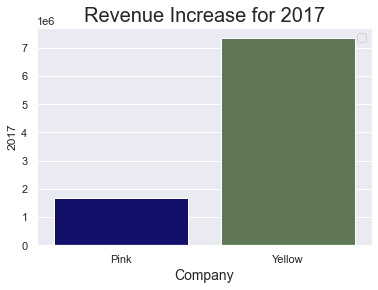

In [49]:
# 2017 Revenue Increase
sns.barplot(x=RevenueIncrease.index, y=RevenueIncrease[2017], palette=["#04007a", "#5e7d4f"])
plt.xlabel('Company',fontsize=14)
plt.title('Revenue Increase for 2017', fontsize=20)
plt.legend()

No handles with labels found to put in legend.


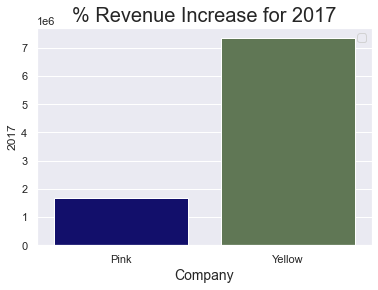

In [50]:
# 2017 % Revenue Increase
sns.barplot(x=RevenueIncrease.index, y=RevenueIncrease[2017], palette=["#04007a", "#5e7d4f"])
plt.xlabel('Company',fontsize=14)
plt.title('% Revenue Increase for 2017', fontsize=20)
plt.legend()

No handles with labels found to put in legend.


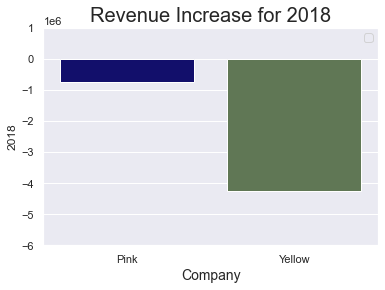

In [51]:
# 2018 Revenue Increase
sns.barplot(x=RevenueIncrease.index, y=RevenueIncrease[2018], palette=["#04007a", "#5e7d4f"])
plt.xlabel('Company',fontsize=14)
plt.title('Revenue Increase for 2018', fontsize=20)
plt.ylim([-6000000, 1000000])
plt.legend()

No handles with labels found to put in legend.


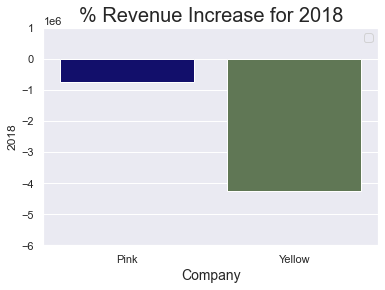

In [52]:
# 2018 % Revenue Increase
sns.barplot(x=RevenueIncrease.index, y=RevenueIncrease[2018], palette=["#04007a", "#5e7d4f"])
plt.xlabel('Company',fontsize=14)
plt.title('% Revenue Increase for 2018', fontsize=20)
plt.ylim([-6000000, 1000000])
plt.legend()

In [53]:
RevenueIncrease

,2017,2018,% Increase 2017,% Increase 2018
Pink,1670150.31,-737486.98,21.12,-7.70
Yellow,7337776.86,-4265066.07,19.07,-9.31


From the Analysis above, Pinks revenue in 2017 increased 21% and they sustained 7.7% loss in 2018,
while Yellows revenue increased 19.07% and they sustained 9.31% loss in 2018

In terms of Revenue Increase, <strong>Pink Cab</strong> company is best to invest in.

# 4. Customer Retention Rate

Formula: ((CE - CN) / CS) x 100

- CE = number of customers at the end of the period
- CN = number of new customers during the period
- CS = number of customers when the measured period began

<!-- Imagine you’ve been selling a SaaS software product, billed monthly, for a few years. You want to determine your customer retention rate for the previous calendar year. After reviewing your customer data, you find:

You had 521 existing customers as of January 1.
You captured 66 new customers between January 1 and December 31.
As of December 31, you had 490 customers.
Plugging these numbers into the formula above, you derive the following number:

490 – 66 / 521 = 81.3%
 -->

This will be used to measure customer experience

In [54]:
# Function to calculate CS, CN and CE
def RetentionRate(customer_base, company_name):
    ### Calculate CS
    customer_base = customer_base
    
    # Calculate CS, get all the unique customers in 2016
    customer_base_2016 = customer_base.loc[customer_base["Date of Travel"].dt.year == 2016]
    customer_base_2016.head()

    # Using .loc[] to drop all columns except Customer ID
    customer_base_CustomerID_2016 = customer_base_2016.loc[:, customer_base_2016.columns == "Customer ID"]
    customer_base_CustomerID_2016.reset_index(drop=True)
    customer_base_CustomerID_2016.head()

    list_of_all_customerID_2016 = customer_base_2016["Customer ID"].unique()
    list_of_all_customerID_2016

    list_of_all_customerID_2016.shape

    CS = len(list_of_all_customerID_2016)

    CS

    ### Calculate CN

    customer_base.head()

    # Calculate CN, This is the number of new customers between january 1st 2017, and December 31st 2018
    customer_base_2017_n_2018 = customer_base.loc[(customer_base["Date of Travel"].dt.year == 2017) | (customer_base["Date of Travel"].dt.year == 2018)]
    customer_base_2017_n_2018.head()

    customer_base_2017_n_2018["Date of Travel"].dt.year.value_counts()

    # Using .loc[] to drop all columns except Customer ID
    customer_base_2017_n_2018 = customer_base_2017_n_2018.loc[:, customer_base_2017_n_2018.columns == "Customer ID"]
    customer_base_2017_n_2018.reset_index(drop=True)
    customer_base_2017_n_2018.head()

    list_of_all_customerID_2017_n_2018 = customer_base_2017_n_2018["Customer ID"].unique()

    list_of_all_customerID_2017_n_2018

    len(list_of_all_customerID_2017_n_2018)

    # To get the number of new customers, get all the customerID in the new list, that is not in customer_base_2016
    new_customers = []
    for item in list_of_all_customerID_2017_n_2018:
        if item not in list_of_all_customerID_2016:
            new_customers.append(item)
        else: pass

    CN = len(new_customers)
    CN

    ### Calculate CE
    
    # Calculate CE, This is the number of customers at the end of the period

    # Calculate CE, get all the unique customers in 2018
    customer_base_2018 = customer_base.loc[customer_base["Date of Travel"].dt.year == 2018]
    customer_base_2018.head()

    customer_base_2018["Date of Travel"].dt.year.value_counts()

    # Using .loc[] to drop all columns except Customer ID
    customer_base_2018 = customer_base_2017_n_2018.loc[:, customer_base_2017_n_2018.columns == "Customer ID"]
    customer_base_2018.reset_index(drop=True)
    customer_base_2018.head()

    list_of_all_customerID_2018 = customer_base_2018["Customer ID"].unique()

    list_of_all_customerID_2018

    CE = len(list_of_all_customerID_2018)
    CE

    # Formula ((CE - CN) / CS) x 100
    CRR = ((CE - CN) / CS) * 100

    # print(f"({CE} - {CN} / {CS}) * 100 = {CRR}")
    print(f"The Customer Rentention rate of {company_name} between 2016 and 2018 is: {round(CRR, 2)}%")
    return company_name, round(CRR, 2)

In [55]:
# RetentionRate(pink_customer_base, "Pink")
pink_retention = RetentionRate(pink_customer_base, "Pink")
pink_retention_rate = pink_retention[1]

The Customer Rentention rate of Pink between 2016 and 2018 is: 69.88%


In [56]:
# RetentionRate(yellow_customer_base, "Yellow")
yellow_retention = RetentionRate(yellow_customer_base, "Pink")
yellow_retention_rate = yellow_retention[1]

The Customer Rentention rate of Pink between 2016 and 2018 is: 83.3%


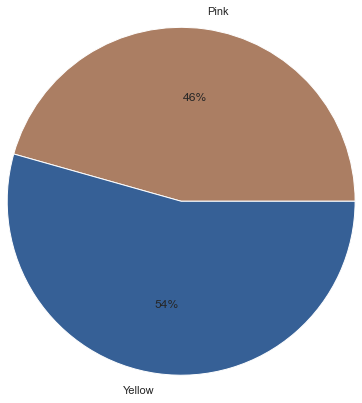

In [57]:
# Plot a Pie chart
data = [pink_retention_rate, yellow_retention_rate,]
labels = ['Pink', 'Yellow']

#create pie chart
plt.pie(data, labels = labels, colors = ["#ab7e63", "#366096"], radius=2, autopct='%.0f%%')
# plt.title("Retention Rate", fontsize = 20)
plt.show()

### Conclusion

- Using Customer Retention Rate as an evaluation metric for Customer Satisfaction, <strong>Yellow Cab</strong> services are more satisfactory with a rentention rate of 83.3% in comparison to Pink with 69.88%

# Evaluate Payment Mode

In [58]:
# Create Master dataset
cab_data = pd.read_csv("Cab_Data.csv")
City_data = pd.read_csv("City.csv")
Customer_data = pd.read_csv("Customer_ID.csv")
Transaction_data = pd.read_csv("Transaction_ID.csv")

In [59]:
cab_data.head()
City_data.head()
Customer_data.head()
Transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [60]:
merge_1 = pd.merge(cab_data, Transaction_data)
merge_2 = pd.merge(merge_1, Customer_data, on="Customer ID")
merge_3 = pd.merge(merge_2, City_data, on="City" )
master_data = merge_3
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,27703,Card,Male,27,9237,"814,885","24,701"


Text(0.5, 0, 'Payment_Mode')

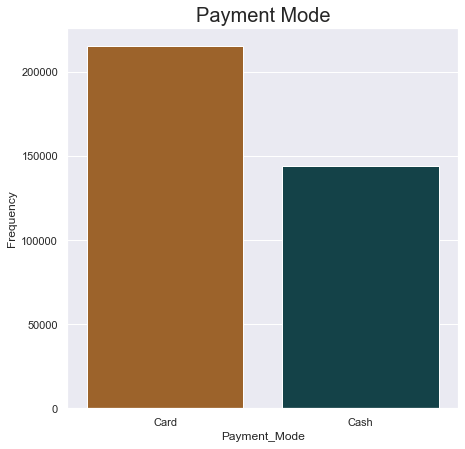

In [61]:
plt.figure(figsize=(7,7))
sns.countplot(data=master_data, x="Payment_Mode", palette=["#af6318", "#0b4951"])
plt.title('Payment Mode', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment_Mode')

Text(0.5, 1.0, 'Payment Mode in both companies')

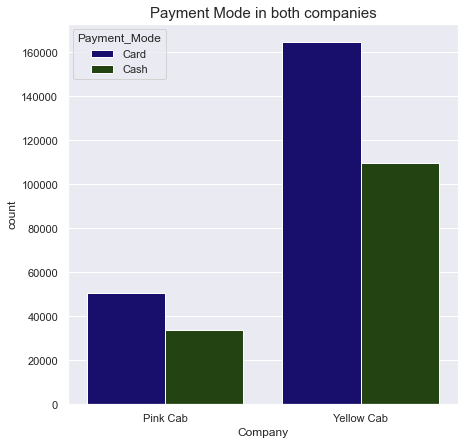

In [62]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=master_data, palette=['#0a007a',"#204c0a"])
plt.title('Payment Mode in both companies', fontsize=15)

### Conclusion

- Majority of the customers of both companies pay in cash rather than cards.

# Hypothesis Testing

### Hypothesis 1:
H0 : There is no difference regarding Payment Mode in both cab companies.

H1 : There is difference regarding Payment Mode in both cab companies.

In [63]:
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

In [64]:
#Pink Cab

data_1 = master_data[(master_data.Payment_Mode=='Cash')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
data_2 = master_data[(master_data.Payment_Mode=='Card')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

t_stat, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793288
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


In [65]:
#Yellow Cab

data_1 = master_data[(master_data.Payment_Mode=='Cash')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
data_2 = master_data[(master_data.Payment_Mode=='Card')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

t_stat, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  0.29330606382985325
We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab


### Hypothesis 2:
H0 : There is no difference regarding Gender in both cab companies.

H1 : There is difference regarding Gender in both cab companies.

In [66]:
#Pink Cab

data_1 = master_data[(master_data.Gender=='Male')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
data_2 = master_data[(master_data.Gender=='Female')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

t_stat, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference for Pink Cab')


P value is  0.11515305900425798
We accept null hypothesis (H0) that there is no difference for Pink Cab


In [67]:
#Yellow Cab

data_1 = master_data[(master_data.Gender=='Male')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
data_2 = master_data[(master_data.Gender=='Female')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

t_stat, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference for Yellow Cab')


P value is  6.060473042494144e-25
We accept alternative hypothesis (H1) that there is a difference for Yellow Cab


### Hypothesis 3:
H0 : There is no difference regarding Age in both cab companies.

H1 : There is difference regarding Age in both cab companies.

In [68]:
master_data.Age.unique()

array([28, 27, 53, 23, 33, 25, 32, 39, 35, 24, 61, 46, 40, 20, 19, 62, 36,
       50, 65, 59, 34, 18, 38, 58, 47, 42, 26, 37, 56, 22, 21, 29, 30, 63,
       48, 55, 51, 60, 31, 41, 52, 45, 64, 44, 43, 54, 49, 57],
      dtype=int64)

In [69]:
#Pink Cab

data_1 = master_data[(master_data.Age <= 60)&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
data_2 = master_data[(master_data.Age > 60)&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

t_stat, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')


P value is  0.18796448671958466
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [70]:
#Yellow Cab

data_1 = master_data[(master_data.Age <= 60)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
data_2 = master_data[(master_data.Age > 60)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

t_stat, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')


P value is  2.8426722804525463e-07
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab
